# PA 2: Classification - Decision Tree

## Student Details
Student Name and ID: KAILASH SHANKAR BHANUSHALI / 1001398090


Notes: When submitting, fill your name and ID in this cell. [1 point]


Do not to forget to cite any external sources used by you. 

## Programming Assignment Submission Instructions


Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName_Option2' [1 point]


## Programming Assignment Details

This is an individual assignment. 

For this assignment use Jupyter notebook, Panda, and scikit.

- Load wine dataset from sklearn datasets.  [2 points]
- Create a dataframe and print the first and last five records of your dataset.  [2 points]
- Print the class names.  [2 points]
- Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]
- Use gini and entropy to measure the quality of a split.  [5 points]
- Use comments to explain your code and variable names. [2 points]
- Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [5 points]
- Print the decision tree visualization.  [5 points]

## Report

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
- describe the Decision Tree method,  [5 points]
- the dataset and if you have done any pre-process, and [5 points]
- your code. [2 points]
- Visualization of the decision tree for gini and entropy.[8 points]
- Interpret your results, and do not forget to compare gini and entropy [10 points]

Do not to forget to cite your sources!


Step 3: Save your report file as 'yourLastName_Last4digitsofyourID_DT.doc' [1 point]

Step 4: Place this file inside the folder 'PA#2_Classification_yourLastName_Option2' [1 point]

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [1]:
# import queries to get the dataset and packages so that to perform operation
# also created the dataframe for the same
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import warnings
from IPython.display import Image 
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
import pydotplus
from sklearn.metrics import confusion_matrix
import collections
from sklearn.metrics import precision_recall_fscore_support
data = load_wine()
df=pd.DataFrame(data=np.c_[data['data'],data['target']],columns=data['feature_names']+['target'])

In [2]:
df.head() # print first 5 records

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [3]:
df.tail() # print last 5 records

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2.0


In [4]:
# print classnames
print( list(data['target_names']))

['class_0', 'class_1', 'class_2']


In [5]:
# train the dataset using test data to train as 30%
data_train, data_test, label_train, label_test = \
train_test_split(data['data'],data['target'],test_size=0.3)

In [6]:
# Training sample data count and sample test data count
print(len(data_train),' Number of samples in training data\n',len(data_test),' Number of samples in test data\n')

124  Number of samples in training data
 54  Number of samples in test data



In [7]:
# classifying tree using gini using fit to train and label data
clf_gini= DecisionTreeClassifier(criterion='gini',random_state = 100, min_samples_leaf=5 ).fit(data_train,label_train)
# predict the data using data test data
pred=clf_gini.predict(data_test)
#confusion matrix with predicted data
cmatrix = confusion_matrix(label_test, pred)
print(cmatrix)

[[18  0  0]
 [ 2 22  1]
 [ 0  0 11]]


In [9]:
#to generate more of classification report
print(classification_report(label_test,pred, target_names=data['target_names']))

              precision    recall  f1-score   support

     class_0       0.90      1.00      0.95        18
     class_1       1.00      0.88      0.94        25
     class_2       0.92      1.00      0.96        11

   micro avg       0.94      0.94      0.94        54
   macro avg       0.94      0.96      0.95        54
weighted avg       0.95      0.94      0.94        54



In [11]:
#It is used to calculate Gini's classification value
prvalue=precision_recall_fscore_support(label_test, pred, average='macro')
print("The Precision for Gini is "+str(prvalue[0]))
print("The Recall for Gini is "+str(prvalue[1]))
print("The fscore for Gini is "+str(prvalue[2]))
print("The Support for Gini is "+str(prvalue[3]))

The Precision for Gini is 0.9388888888888888
The Recall for Gini is 0.96
The fscore for Gini is 0.946686790983008
The Support for Gini is None


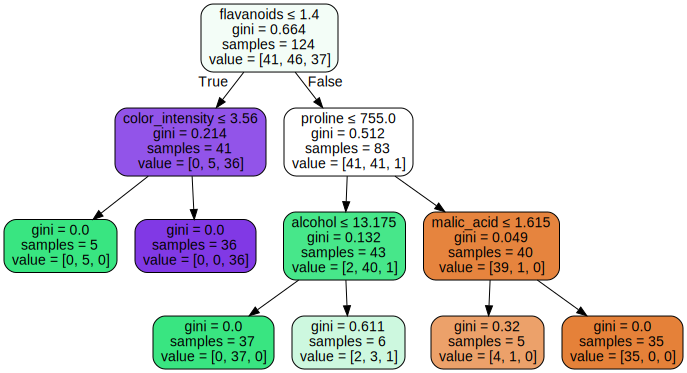

In [12]:
# to generate graph using gini  and feature name used to create intutive features
graph2=Source(tree.export_graphviz(clf_gini,special_characters = True, feature_names=data.feature_names,rounded=True, out_file=None, filled = True))
# to display the graph
display(SVG(graph2.pipe(format='svg')))


In [14]:
#Confusion matrix predict and calculate for entropy
clf_entropy= DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=4,).fit(data_train,label_train)
tree.export_graphviz(clf_entropy, out_file = None, filled=True, rounded=True, special_characters=True)
pred1=clf_entropy.predict(data_test)
cm_entropy = confusion_matrix(label_test, pred1)
print(cm_entropy)


[[18  0  0]
 [ 2 22  1]
 [ 0  0 11]]


In [21]:
#to generate more of classification report
print(classification_report(label_test,pred1, target_names=data['target_names']))


              precision    recall  f1-score   support

     class_0       0.90      1.00      0.95        18
     class_1       1.00      0.88      0.94        25
     class_2       0.92      1.00      0.96        11

   micro avg       0.94      0.94      0.94        54
   macro avg       0.94      0.96      0.95        54
weighted avg       0.95      0.94      0.94        54



In [20]:
#It is used to calculate Gini's classification value
prvalues=precision_recall_fscore_support(label_test, pred1, average='macro')
print("The Precision for Entropy is "+str(prvalues[0]))
print("The Recall for Entropy is "+str(prvalues[1]))
print("The fscore for Entropy is "+str(prvalues[2]))
print("The Support for Entropy is "+str(prvalues[3]))

The Precision for Entropy is 0.9388888888888888
The Recall for Entropy is 0.96
The fscore for Entropy is 0.946686790983008
The Support for Entropy is None


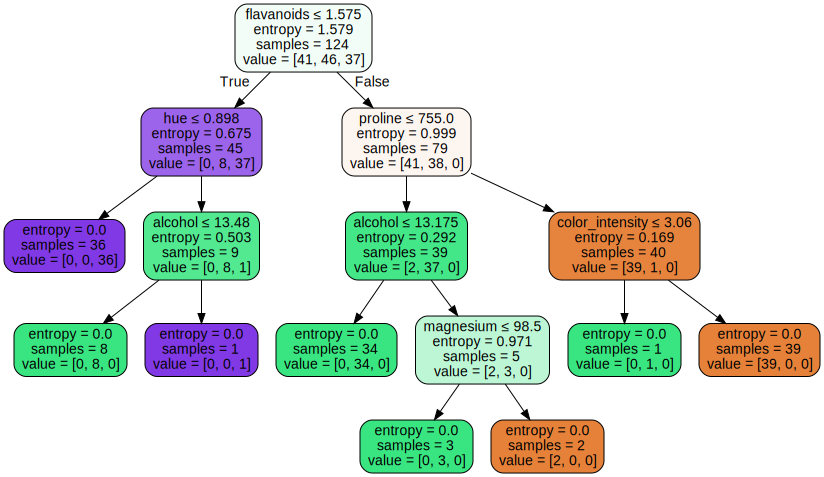

In [15]:
#to generate graph using entropy and feature name used to create intutive features
dot_data_entropy = tree.export_graphviz(clf_entropy,special_characters=True, feature_names=data.feature_names, out_file=None, filled=True,rounded=True)
graph = Source(tree.export_graphviz(clf_entropy,special_characters=True, feature_names=data.feature_names,rounded=True, out_file=None, filled = True))
#to display the graph
display(SVG(graph.pipe(format='svg')))
